In [152]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [153]:
# df1 = pd.read_csv('mls-salaries-2007.csv')
# df1['Year'] = 2007
# df1 = pd.read_csv('mls-salaries-2008.csv')
# df1['Year'] = 2008
# df1 = pd.read_csv('mls-salaries-2009.csv')
# df1['Year'] = 2009
# ...

import glob

df={}
all_csvs=[]
    
for i, file in enumerate(glob.glob("*.csv")):
    df[i] = pd.read_csv(file)
    name = file.split('.')[0]
    df[i]['Year'] = name[-4:]
    all_csvs.append(df[i])

df = pd.concat(all_csvs)


In [157]:
df.head()

,club,last_name,first_name,position,base_salary,guaranteed_compensation,Year
0,CHI,Armas,Chris,M,225000.0,225000.0,2007
1,CHI,Banner,Michael,M,12900.0,12900.0,2007
2,CHI,Barrett,Chad,F,41212.5,48712.5,2007
3,CHI,Blanco,Cuauhtemoc,F,2492316.0,2666778.0,2007
4,CHI,Brown,C.J.,D,106391.0,106391.0,2007


In [154]:
round(df['base_salary'].mean())

189336.0

In [187]:
club_salary = round(df[(df['Year']=='2017')].groupby(['club']).mean())['base_salary'].sort_values(ascending=False)
club_salary

club
TOR      743517.0
NYCFC    620376.0
CHI      454542.0
ORL      412735.0
LA       364210.0
SEA      359468.0
POR      344242.0
COL      279029.0
ATL      259213.0
RSL      253942.0
KC       239379.0
NE       235087.0
NYRB     225499.0
SJ       221709.0
VAN      220011.0
CLB      211508.0
PHI      210222.0
DAL      206572.0
MTL      187951.0
MNUFC    182446.0
DC       178227.0
HOU      175145.0
LAFC      59004.0
Name: base_salary, dtype: float64

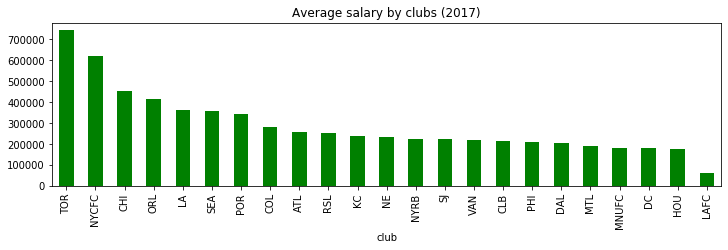

In [193]:
club_salary.plot.bar(x='club', y='base_salary', figsize=(12,3), color='g', title='Average salary by clubs (2017)')
plt.savefig('bar.png', bbox_inches = "tight")
plt.show()

In [182]:
avg_by_year = round(df.groupby('Year', as_index=False).mean())
avg_by_year

,Year,base_salary,guaranteed_compensation
0,2007,103715.0,113810.0
1,2008,104706.0,115348.0
2,2009,120874.0,133706.0
3,2010,155983.0,173491.0
4,2011,142840.0,162056.0
5,2012,156124.0,179166.0
6,2013,147238.0,165066.0
7,2014,204008.0,226454.0
8,2015,264403.0,291933.0
9,2016,290246.0,316777.0


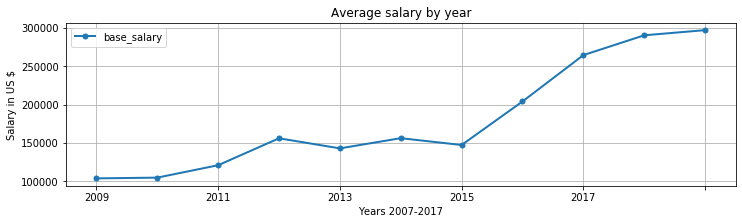

In [192]:
avg_by_year.plot.line(x='Year', y='base_salary', figsize=(12,3), lw=2, marker='.', markersize=10, grid=True, 
         title='Average salary by year')
plt.xlabel('Years 2007-2017')
plt.ylabel('Salary in US $')
plt.savefig('line.png', bbox_inches = "tight")
plt.show()